# Immigration

In [125]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [126]:
df = pd.read_csv('Data_cleaned/immigration.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,immigration_rate,Country_Year
0,2000,Year_2000
1,107148,Australia_2000
2,65954,Austria_2000
3,57295,Belgium_2000
4,227455,Canada_2000


In [127]:
df['Country'] = df['Country_Year'].str.split('_').str.get(0)
df['Year'] = df['Country_Year'].str.split('_').str.get(1)
df = df.drop(columns=['Country_Year'])
df = df.drop(df.index[0])

df.head()

,immigration_rate,Country,Year
1,107148,Australia,2000
2,65954,Austria,2000
3,57295,Belgium,2000
4,227455,Canada,2000
5,18741,Chile,2000


In [128]:
df.shape

(850, 3)

In [129]:
df.head()

,immigration_rate,Country,Year
1,107148,Australia,2000
2,65954,Austria,2000
3,57295,Belgium,2000
4,227455,Canada,2000
5,18741,Chile,2000


In [130]:
df.head()

,immigration_rate,Country,Year
1,107148,Australia,2000
2,65954,Austria,2000
3,57295,Belgium,2000
4,227455,Canada,2000
5,18741,Chile,2000


In [131]:

df['immigration_rate'] = pd.to_numeric(df['immigration_rate'], errors='coerce')
df = df.dropna()

pivot_df = df.pivot_table(index='Year', columns='Country', values='immigration_rate')
pivot_df = pivot_df.drop(columns=['Year'])
pivot_df = pivot_df.reset_index()


pivot_df.head()

Country,Year,Australia,Austria,Belgium,Canada,Chile,Czechia,Denmark,Estonia,Finland,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
0,2000,107148.0,65954.0,57295.0,227455.0,18741.0,4227.0,22766.0,NaN,9110.0,...,15897.0,15932.0,4622.0,NaN,330881.0,42216.0,87448.0,NaN,260424.0,841002.0
1,2001,127877.0,74786.0,65974.0,250640.0,28924.0,11323.0,24642.0,NaN,11037.0,...,21466.0,151433.0,4723.0,NaN,394048.0,43833.0,101353.0,NaN,262239.0,1058902.0
2,2002,119080.0,86144.0,70230.0,228919.0,29942.0,43648.0,21485.0,NaN,9972.0,...,30243.0,71974.0,4784.0,NaN,443085.0,47603.0,101876.0,NaN,288770.0,1059356.0
3,2003,123411.0,93341.0,68800.0,221349.0,29835.0,57438.0,18385.0,NaN,9432.0,...,30325.0,31754.0,4562.0,NaN,429524.0,47988.0,94049.0,NaN,327405.0,703542.0
4,2004,146441.0,104246.0,72446.0,235822.0,32099.0,50804.0,18706.0,759.0,11511.0,...,36851.0,34096.0,7919.0,NaN,645844.0,47580.0,96270.0,NaN,434322.0,957883.0


In [132]:
nan_per_row = pivot_df.isna().sum(axis=1)
nan_per_column = pivot_df.isna().sum()
for country, nan_count in nan_per_column.items(): 
    if nan_count > 0: 
        print(f"NaN count for {country}: {nan_count}")

NaN count for Australia: 1
NaN count for Austria: 1
NaN count for Belgium: 1
NaN count for Canada: 1
NaN count for Czechia: 1
NaN count for Denmark: 1
NaN count for Estonia: 5
NaN count for Finland: 1
NaN count for France: 1
NaN count for Germany: 1
NaN count for Greece: 6
NaN count for Iceland: 1
NaN count for Ireland: 1
NaN count for Israel: 1
NaN count for Italy: 1
NaN count for Japan: 1
NaN count for Korea: 1
NaN count for Latvia: 4
NaN count for Luxembourg: 1
NaN count for Netherlands: 1
NaN count for Norway: 1
NaN count for Poland: 1
NaN count for Portugal: 1
NaN count for Slovenia: 8
NaN count for Spain: 1
NaN count for Sweden: 1
NaN count for Switzerland: 1
NaN count for Türkiye: 16
NaN count for United Kingdom: 3
NaN count for United States: 1


In [133]:
pivot_df=pivot_df.drop(columns=['Türkiye'])

In [134]:
pivot_df.head()

Country,Year,Australia,Austria,Belgium,Canada,Chile,Czechia,Denmark,Estonia,Finland,...,Norway,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,United Kingdom,United States
0,2000,107148.0,65954.0,57295.0,227455.0,18741.0,4227.0,22766.0,NaN,9110.0,...,27785.0,15897.0,15932.0,4622.0,NaN,330881.0,42216.0,87448.0,260424.0,841002.0
1,2001,127877.0,74786.0,65974.0,250640.0,28924.0,11323.0,24642.0,NaN,11037.0,...,25412.0,21466.0,151433.0,4723.0,NaN,394048.0,43833.0,101353.0,262239.0,1058902.0
2,2002,119080.0,86144.0,70230.0,228919.0,29942.0,43648.0,21485.0,NaN,9972.0,...,30788.0,30243.0,71974.0,4784.0,NaN,443085.0,47603.0,101876.0,288770.0,1059356.0
3,2003,123411.0,93341.0,68800.0,221349.0,29835.0,57438.0,18385.0,NaN,9432.0,...,26787.0,30325.0,31754.0,4562.0,NaN,429524.0,47988.0,94049.0,327405.0,703542.0
4,2004,146441.0,104246.0,72446.0,235822.0,32099.0,50804.0,18706.0,759.0,11511.0,...,27864.0,36851.0,34096.0,7919.0,NaN,645844.0,47580.0,96270.0,434322.0,957883.0


In [135]:
other_df = df.pivot(index = 'Country', columns = 'Year', values= 'immigration_rate')
other_df = other_df.reset_index()
other_df = other_df.drop(columns=['2022'])

other_df.head()


Year,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Australia,107148.0,127877.0,119080.0,123411.0,146441.0,161734.0,176205.0,189490.0,203874.0,...,235993.0,244849.0,233908.0,223654.0,218488.0,224220.0,186640.0,155817.0,137465.0,153826.0
1,Austria,65954.0,74786.0,86144.0,93341.0,104246.0,97995.0,82899.0,91546.0,94368.0,...,125605.0,135228.0,154260.0,198658.0,158746.0,139329.0,131724.0,134966.0,121311.0,139543.0
2,Belgium,57295.0,65974.0,70230.0,68800.0,72446.0,77411.0,83433.0,93387.0,106012.0,...,116055.0,105529.0,106345.0,128762.0,106087.0,109167.0,119663.0,129450.0,101553.0,122386.0
3,Canada,227455.0,250640.0,228919.0,221349.0,235822.0,262244.0,251641.0,236751.0,247242.0,...,257763.0,259034.0,260283.0,271808.0,296740.0,286447.0,321042.0,341175.0,184585.0,405795.0
4,Chile,18741.0,28924.0,29942.0,29835.0,32099.0,40793.0,37035.0,53071.0,43577.0,...,65247.0,84352.0,83549.0,101911.0,135490.0,207200.0,339350.0,254080.0,154551.0,76545.0


In [136]:
other_df.set_index('Country', inplace=True)

df_transposed = other_df.transpose()
df_transposed.head()

Country,Australia,Austria,Belgium,Canada,Chile,Czechia,Denmark,Estonia,Finland,France,...,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States,Year
Year,,,,,,,,,,,,,,,,,,,,,
2000,107148.0,65954.0,57295.0,227455.0,18741.0,4227.0,22766.0,NaN,9110.0,91875.0,...,15932.0,4622.0,NaN,330881.0,42216.0,87448.0,NaN,260424.0,841002.0,NaN
2001,127877.0,74786.0,65974.0,250640.0,28924.0,11323.0,24642.0,NaN,11037.0,106877.0,...,151433.0,4723.0,NaN,394048.0,43833.0,101353.0,NaN,262239.0,1058902.0,2001.0
2002,119080.0,86144.0,70230.0,228919.0,29942.0,43648.0,21485.0,NaN,9972.0,124232.0,...,71974.0,4784.0,NaN,443085.0,47603.0,101876.0,NaN,288770.0,1059356.0,2002.0
2003,123411.0,93341.0,68800.0,221349.0,29835.0,57438.0,18385.0,NaN,9432.0,136370.0,...,31754.0,4562.0,NaN,429524.0,47988.0,94049.0,NaN,327405.0,703542.0,2003.0
2004,146441.0,104246.0,72446.0,235822.0,32099.0,50804.0,18706.0,759.0,11511.0,141554.0,...,34096.0,7919.0,NaN,645844.0,47580.0,96270.0,NaN,434322.0,957883.0,2004.0


<Figure size 1000x600 with 0 Axes>

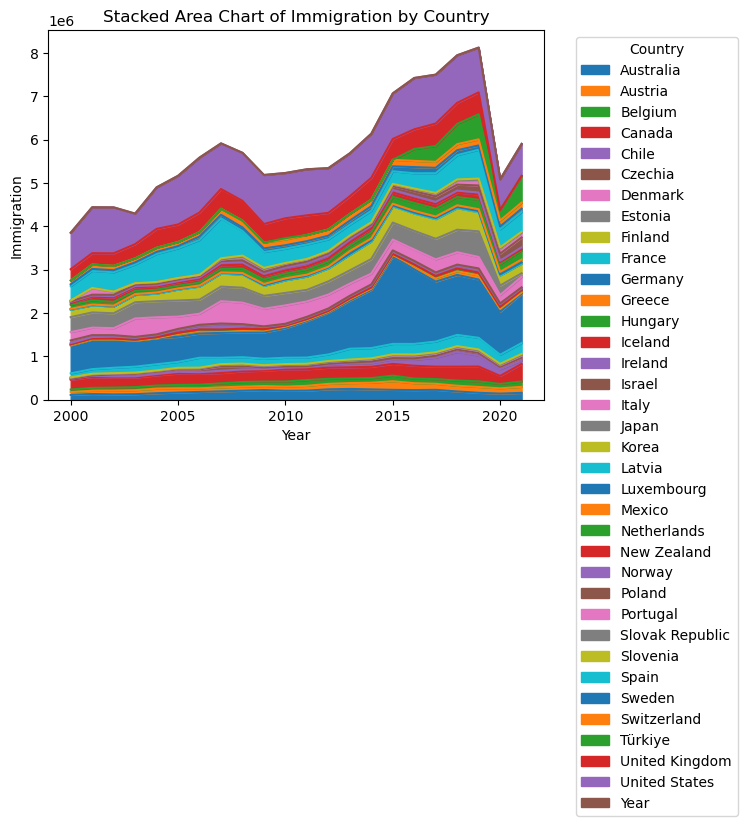

In [137]:


# Plot the stacked area chart
plt.figure(figsize=(10, 6))
df_transposed.plot(kind='area', stacked=True)
plt.title('Stacked Area Chart of Immigration by Country')
plt.xlabel('Year')
plt.ylabel('Immigration')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()